<a href="https://colab.research.google.com/github/kindachamma1/ComputerVision2025/blob/Exercise2/Exercise2_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: IMAGE SEGMENTATION**

Kinda Chamma

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


**Task 1**: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.


---





<ipython-input-4-63cf48a6d897>:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
<ipython-input-4-63cf48a6d897>:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


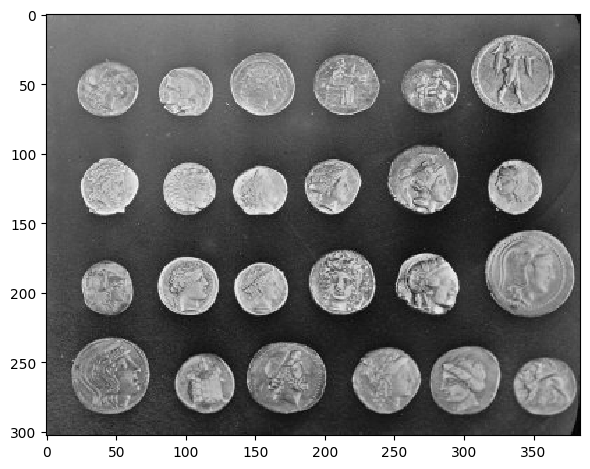

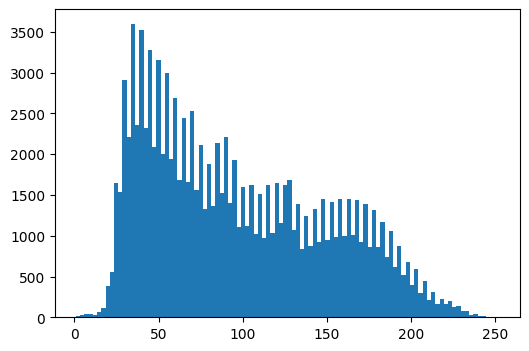

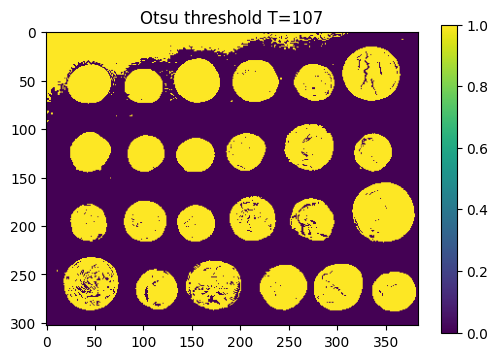

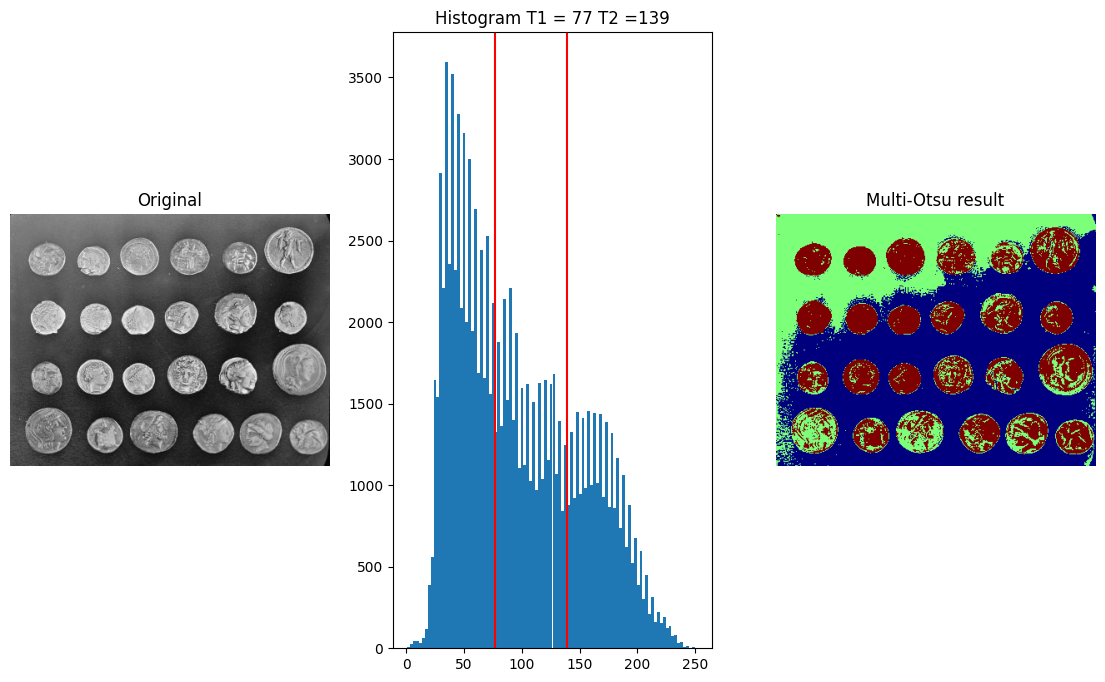

In [4]:
# 1. Load the image
import skimage as sk
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np


I = sk.data.coins()

sk.io.imshow(I)
sk.io.show()

I.shape

# 2. Visualize the histogram
flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

# 3. Apply Otsu Optimal Threshold
thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

# 4. Apply Otsu multiple thresholds


# Applying multi-Otsu threshold for the default value, generating
# three classes by default
thresholds = threshold_multiotsu(I)

# Using the threshold values, we generate the three regions.
regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting the original image.
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(flat_data, bins=100,range=[1,flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()


**Observation**: The choise of the image is arbitrary. For the threshold, since the histogram doesn't have a clear separation, I decided to apply the optimal ostu. After applying it, I noticed that in the upper left there is a region considered as yellow, even if it's not the case. I decided them to apply the multi otsu but the result was worse, showing that sometimes the choice of a low complexity method is better. I believe that we can apply some sort of a filter on the optimal otsu thresholding, and then apply it again to get a better result.



---


**Task 2**: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.



---



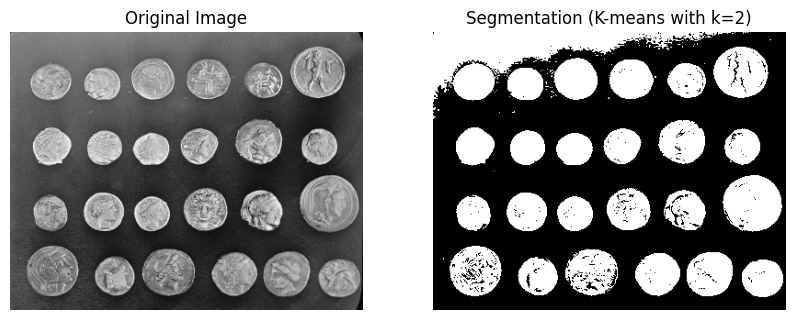

In [5]:
# 1. Load image : will use the same as previously
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# 2. K-means
# Reshape the image into (N_PIXELS, N_FEATURES) for clustering
v_I = np.reshape(I, (-1, 1))  # shape: (303*384, 1)

# Fit KMeans with 2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict cluster assignments for each pixel
v_kmeans = kmeans.predict(v_I)

# Reshape clustered labels back to original image shape
I_kmeans = np.reshape(v_kmeans, I.shape)

# 3. Visualization
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.axis('off')

plt.show()

**Observation**: I tried to apply with k=1 -> k=4 (not more, because this means that the image still needs preprocessing, which isn't the case here). The best segmentation was the one made with k=2. The only issue, present as before, is the white space in the upper left. A filter should be able to mitigate this issue.



---


**Task 3**: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.



---



For this, I will use the image of human red blood cells with the ground truth corresponding.

Images where found on this link : https://bbbc.broadinstitute.org/BBBC009

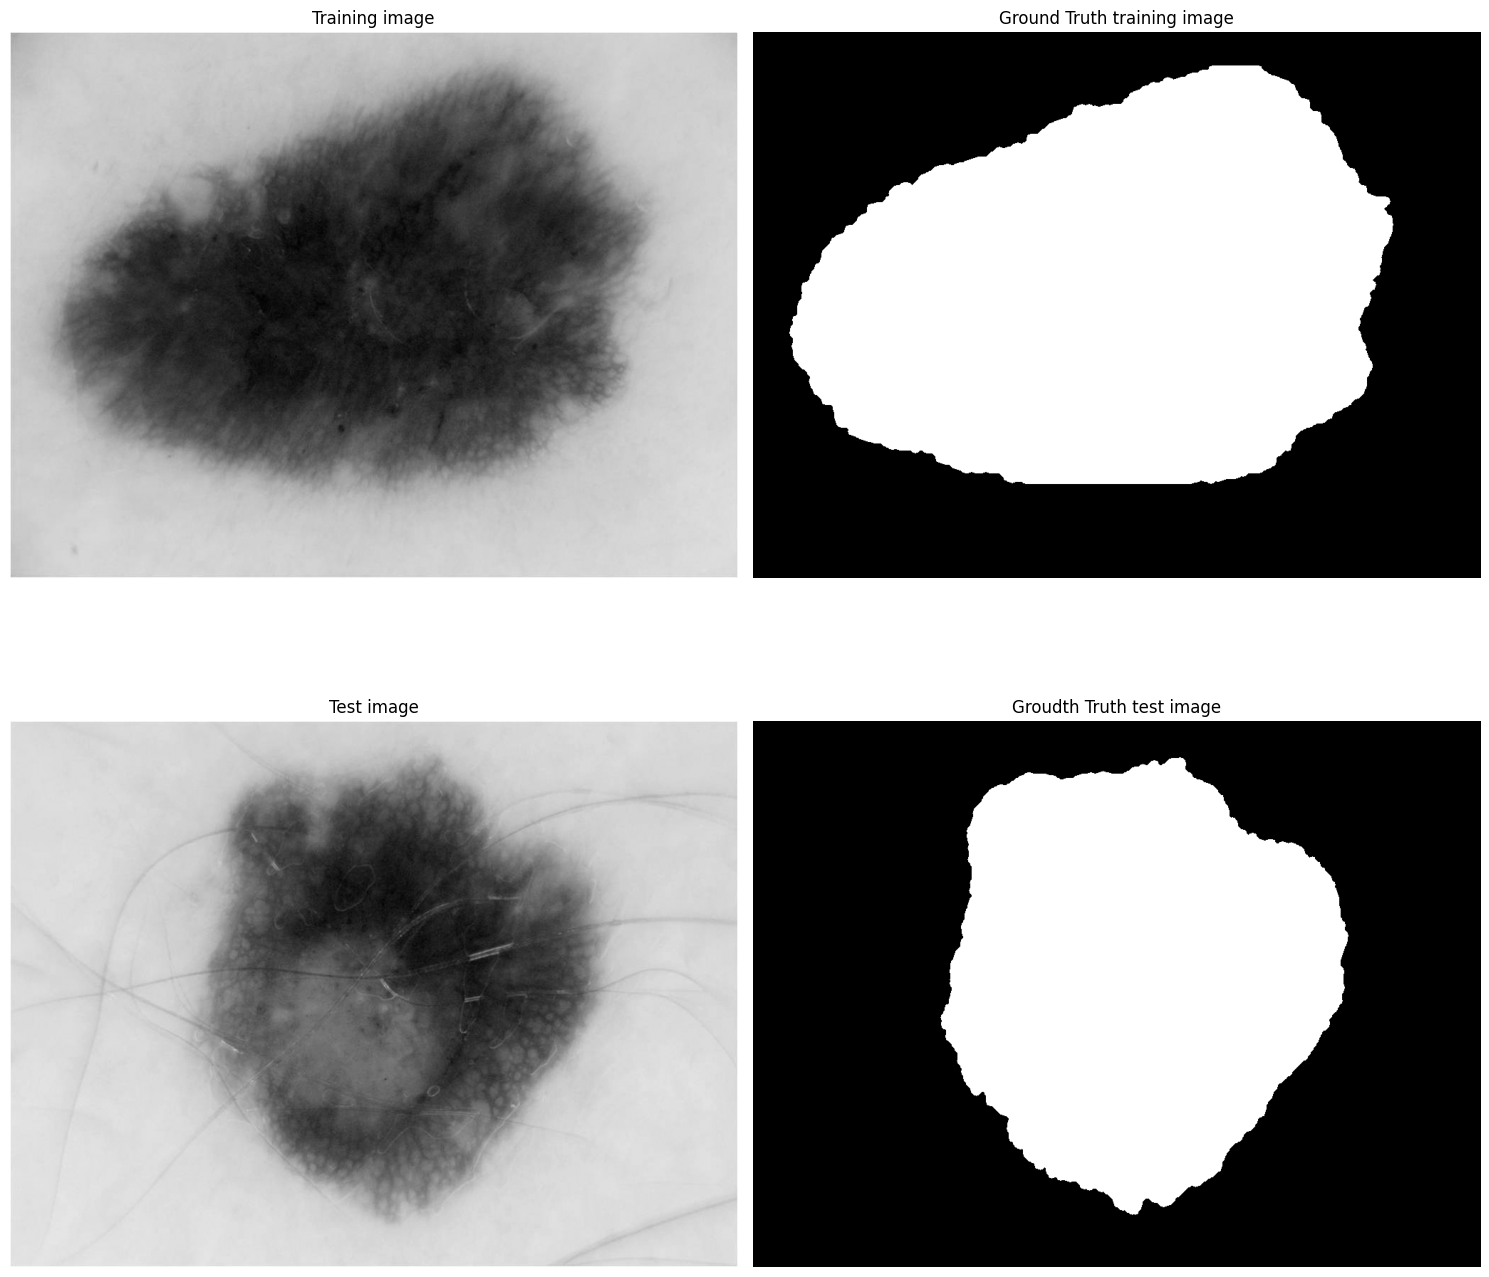

In [12]:
# 1. Visualize the images
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec

path = '/content/sample_data/'

I_train = sk.io.imread(os.path.join(path,'train.jpg'))
I_train_GT = sk.io.imread(os.path.join(path,'train_Groundtruth.png'))
I_test = sk.io.imread(os.path.join(path,'test.jpg'))
I_test_GT = sk.io.imread(os.path.join(path,'test_Groundtruth.png'))

# Transform train and test images to grey scale
I_train = sk.color.rgb2gray(I_train)
I_test = sk.color.rgb2gray(I_test)


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(I_test, cmap=plt.cm.gray)
ax2.set_title('Test image')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(I_test_GT, cmap=plt.cm.gray)
ax3.set_title('Groudth Truth test image')
ax3.set_axis_off()

plt.tight_layout()
plt.show()



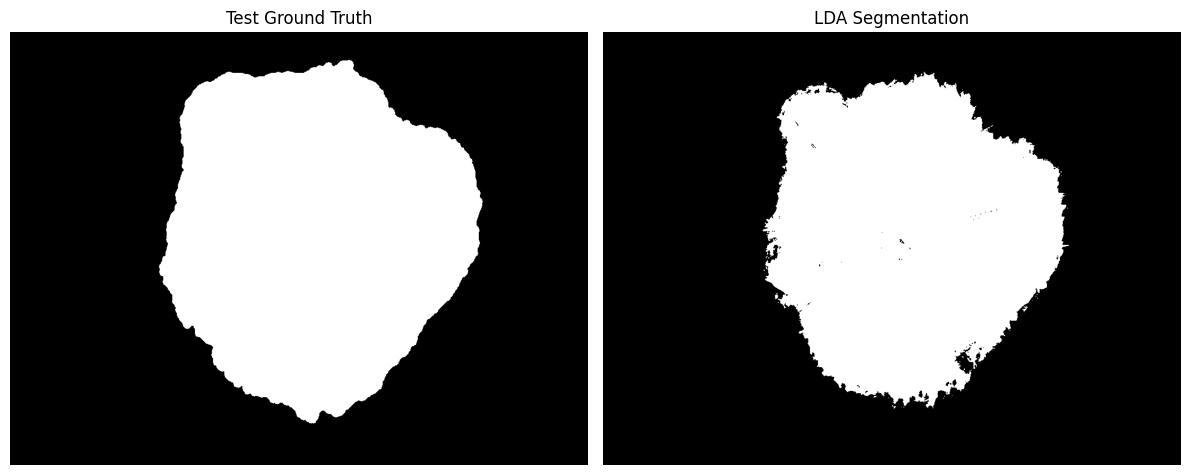

In [25]:
# 2. LDA Segmentation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2.1 This step was made because I had index error
I_train = I_train.astype(np.float32) / 255.0
I_test = I_test.astype(np.float32) / 255.0

# 2.2 Reshape
v_I_train = I_train.reshape(-1, 1)
v_I_test = I_test.reshape(-1, 1)

# 2.3 Flatten and binarize ground truth (ensure 0 and 1 only)
v_train_GT = (I_train_GT > 0).reshape(-1).astype(np.uint8)

# 2.4 Train LDA model
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT)

# 2.5 Predict test image
v_lda = lda_model.predict(v_I_test)
I_lda = v_lda.reshape(I_test.shape).astype(np.uint8)

# 2.6 Show results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(I_test_GT, cmap='gray')
ax[0].set_title('Test Ground Truth')
ax[0].axis('off')

ax[1].imshow(I_lda, cmap='gray')
ax[1].set_title('LDA Segmentation')
ax[1].axis('off')

plt.tight_layout()
plt.show()

**Observation** : We notice that the result isn't bad with respect to the ground truth. The region is well marked, but could have been better presented with respect to the edges.
Robert segmnetation can be applied to enhance the contour/shaping, as well as the salt method.



---


**Task 4**: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.


---



**Explanation** : The supervised segmentation approach involves a training model on labeled image data, this means that it can achieve a high accoruacy if trained on quality data. It requires annotated ground truth and might risk of overfitting. The unsupervised segmentation works differently, by finding natural grouping in the data prior labeling, THere is thus no need for laeled data. A drawback is that it can segment irrelavnt structures if data is noisy. Note that almost all the approaches we have seen can be supervised or unsupervised; it's a matter of adapting the algorithm.

**Illustratrion** : To illustrate the difference between these two approaches, we can check the same example I used in task 3 on which I applied the LDA method. I will apply now the k-means, an unsupervised approach which is faster.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


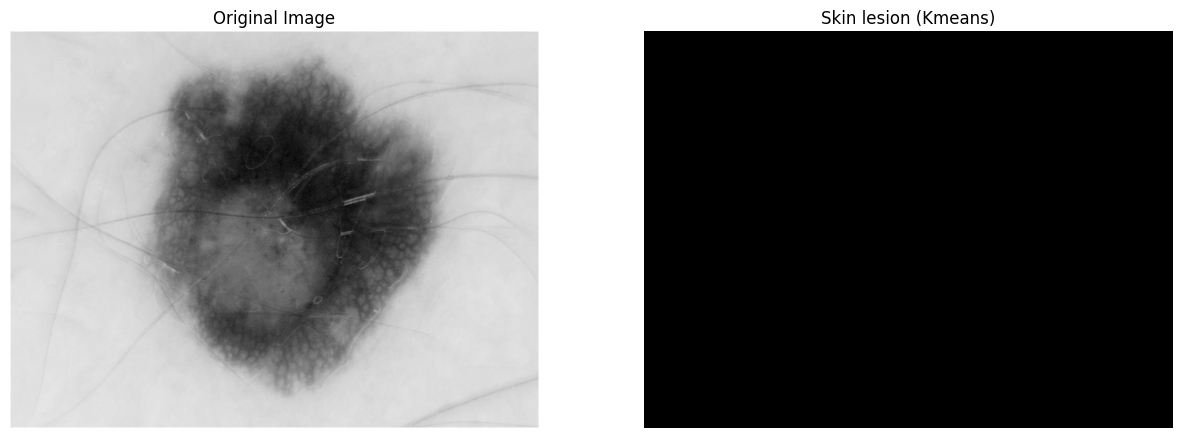

In [28]:
from sklearn.cluster import KMeans
import numpy as np

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=4, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Skin lesion (Kmeans)')
ax2.set_axis_off()

plt.show()

**Observation** : Even with the variation of the number of cluster between 1 and 4, the result is a black image. This goes to the fact that the unsupervised approach is data-driven and harder to tune. As we have noise
 that can be seen,presented by the hair follicles, we know that the segmentation will show irrelevant structures. A prior preprocessing must be performed.

 This being said, the unsupervised approach remains an important method, but each method works best in different scenarios.